In [1]:
class Ad:
    def __init__(self):
        self.N = 0
        self.R = []
        self.TR = 0
        self.AR = 0
        
        
    def reward(self , rew, n):
        
        self.N +=1
        self.R.append(rew)
        self.TR +=rew
        self.AR = self.TR/self.N        

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def opt_selector(ADS,n):
    import random
    UCB = []
    k=0
    for i in ADS:
        from math import sqrt ,  log10
        try:
            ucb =i.AR + sqrt(1.5*log10(n)/i.N)
        except:
            ucb=1e400
        
        UCB.append((ucb,k))
        k+=1
    
    UCB.sort()
    t = []
    for i in range(10):
        if UCB[i][0] == UCB[9][0]:
            t.append(UCB[i][1])
        
    t.sort()
   
    return random.randint(t[0] , t[-1])

In [4]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")
Data = np.matrix(dataset)

r,c = Data.shape

ADS=[]
for i in range(c):
    ADS.append(Ad())
dataset
TotalRew=0
Ad_Shown = []

We have 10 advertisments for a product. We dont know which one is going to be the most effective. The dataset contains data of 10000 users depicting which ads from 10 will they click if shown to them. We need to maximize the clicks

In [5]:
for i in range(r):
    
    if i<10:
        k = i
        
    else:
    
        k = opt_selector(ADS,i)
    Ad_Shown.append(k+1)
   
    
    rew = Data[i,k]
    ADS[k].reward(rew,i+1)
    TotalRew+=rew

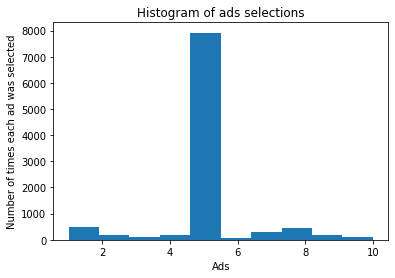

In [6]:
plt.hist(Ad_Shown)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [7]:
print("Total Number of AD clicks : " + str(TotalRew) + "/10000")

Total Number of AD clicks : 2420/10000
